In [1]:
import pandas as pd
from IPython.display import clear_output

In [2]:
import random
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt

class ReversedDecisionModel:
    
    def __init__(self):
        pass
        
    def convert_k_to_p(self, d_prime, k1, k2):
        
        a_given_a = st.norm.cdf(k1 + d_prime/2)
        b_given_a = 1 - st.norm.cdf(k2 + d_prime/2)
        a_given_b = st.norm.cdf(k1 - d_prime/2)
        b_given_b = 1 - st.norm.cdf(k2 - d_prime/2)
        
        p_aa = a_given_a*a_given_b + b_given_a*b_given_b
        p_ab = a_given_a**2 + b_given_a**2
        p_ba = a_given_b**2 + b_given_b**2
        p_bb = a_given_b*a_given_a + b_given_b*b_given_a
        
        p_false = p_aa + p_bb
        p_hit = p_ab + p_ba
        
        return p_false/2, p_hit/2
        
    def convert_k_to_z(self, d_prime, k1, k2):
        
        p_false, p_hit = self.convert_k_to_p(d_prime, k1, k2)
        return st.norm.ppf(p_false), st.norm.ppf(p_hit)
        
    def sample_k1_k2_values_to_z(self, k_range, d_prime, num_points):
        
        #RC2a
        zf_vals = []
        zh_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k1 = random.choice(k_range)
            k2 = random.choice(k_range)
            
            z_f, z_h = self.convert_k_to_z(d_prime, -k1, k2)
            
            zf_vals.append(z_f)
            zh_vals.append(z_h)
            
        return zf_vals, zh_vals
    
    def sample_k1_k2_values_to_p(self, k_range, d_prime, num_points):
        
        # RC2a
        pf_vals = []
        ph_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k1 = random.choice(k_range)
            k2 = random.choice(k_range)
            
            p_f, p_h = self.convert_k_to_p(d_prime, -k1, k2)
            
            pf_vals.append(p_f)
            ph_vals.append(p_h)
            
        return pf_vals, ph_vals
    
    def sample_k_values_to_z(self, k_range, d_prime, num_points):
        
        # CC2s / RC2s
        zf_vals = []
        zh_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k = random.choice(k_range)
            z_f, z_h = self.convert_k_to_z(d_prime, -k, k)
            
            zf_vals.append(z_f)
            zh_vals.append(z_h)
            
        return zf_vals, zh_vals
    
    def sample_k_values_to_p(self, k_range, d_prime, num_points):
        
        # CC2s / RC2s
        pf_vals = []
        ph_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k = random.choice(k_range)
            p_f, p_h = self.convert_k_to_p(d_prime, -k, k)
            
            pf_vals.append(p_f)
            ph_vals.append(p_h)
            
        return pf_vals, ph_vals
    
    def get_k_values_to_z(self, k_range, d_prime):
        
        # CC2s / RC2s
        zf_vals = []
        zh_vals = []
        
        for k in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num']):
            z_f, z_h = self.convert_k_to_z(d_prime, -k, k)
            
            zf_vals.append(z_f)
            zh_vals.append(z_h)
            
        return zf_vals, zh_vals
    
    def get_k_values_to_p(self, k_range, d_prime):
        
        # CC2s / RC2s
        pf_vals = []
        ph_vals = []
        
        for k in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num']):
            p_f, p_h = self.convert_k_to_p(d_prime, -k, k)
            
            pf_vals.append(p_f)
            ph_vals.append(p_h)
            
        return pf_vals, ph_vals

rc_model = ReversedDecisionModel()

# RC2 k-Value Grid Sampling

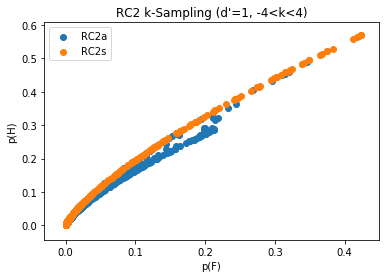

In [4]:
k_range = {'k_min': 0, 'k_max': 4, 'k_num': 1001}
pfa_vals, pha_vals = rc_model.sample_k1_k2_values_to_p(k_range, 1, 500)
pfs_vals, phs_vals = rc_model.sample_k_values_to_p(k_range, 1, 500)

plt.scatter(pfa_vals, pha_vals, label='RC2a')
plt.scatter(pfs_vals, phs_vals, label='RC2s')
plt.xlabel('p(F)')
plt.ylabel('p(H)')
plt.title('RC2 k-Sampling (d\'=1, -4<k<4)')
plt.legend()

In [112]:
# RC2a/RC2s k-sampling using subject slope-intercept data

k_range = {'k_min': -4, 'k_max': 4, 'k_num': 101}
dp_range = {'dp_min': 0, 'dp_max': 2, 'dp_num': 11}

mb_data = pd.read_csv('data/mb_data.csv', index_col=0)
x_vals = [-4, 4]

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    zfa_vals, zha_vals = rc_model.sample_k1_k2_values_to_z(k_range, dp, 500)
    zfs_vals, zhs_vals = rc_model.sample_k_values_to_z(k_range, dp, 500)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(zfa_vals, zha_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black', label='RC2a')
    plt.scatter(zfs_vals, zhs_vals, alpha=0.3, marker='s', facecolor="none", edgecolor='black', label='RC2s')
    for index, row in mb_data.iterrows():
        slope, intercept = row['Slope'], row['Intercept']
        pred_vals = [slope * n + intercept for n in x_vals]
        plt.plot(x_vals, pred_vals, color='black', alpha=0.1)
    plt.xlabel('z(F)')
    plt.ylabel('z(H)')
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.title(f'RC2 k-Value Sampling (d\'={round(dp,2)}, 0<k<4)')
    plt.legend()
    plt.savefig(f'results/k_sampling{round(dp,2)}.png')
    plt.clf()

<Figure size 576x432 with 0 Axes>

In [16]:
# RC2 k-sampling w/ subject z-value data

k_range = {'k_min': -4, 'k_max': 4, 'k_num': 201}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 26}

data = pd.read_csv('data/z_data.csv', index_col=0)
x_vals = [-4, 4]
explained_subs = ['BYZ','HP','HYP','SL','YPL','YJC','ZJT','QP','TCD','YCX','ZXL','ZY','CW','WJ','RSL','SJ2','LXL','SYB','WY','YJX','CY','GJ','JYN','SJ','SXQ','ZQT']

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    zfa_vals, zha_vals = rc_model.sample_k1_k2_values_to_z(k_range, dp, 1000)
    zfs_vals, zhs_vals = rc_model.sample_k_values_to_z(k_range, dp, 500)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(zfa_vals, zha_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black', label='RC2a')
    plt.scatter(zfs_vals, zhs_vals, alpha=0.3, marker='s', facecolor="none", edgecolor='black', label='RC2s')

    for i in range(len(data)):
        sub_data = data.iloc[i]
        if sub_data['Subject'] in explained_subs:
            alpha = 0.3
            zf_vals = sub_data.filter(like='ZF').tolist()
            zh_vals = sub_data.filter(like='ZH').tolist()
            plt.plot(zf_vals, zh_vals, color='black', alpha=alpha)    
    
    plt.xlabel('z(F)')
    plt.ylabel('z(H)')
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.title(f'RC2 k-Value Sampling (d\'={round(dp,2)}, -4<k<4)')
    plt.legend()
    plt.savefig(f'results/k_sampling{round(dp,2)}.png')
    plt.clf()


<Figure size 576x432 with 0 Axes>

In [18]:
# RC2a k-sampling w/ subject p-value data

k_range = {'k_min': -4, 'k_max': 4, 'k_num': 201}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 26}

data = pd.read_csv('data/p_data.csv', index_col=0)
x_vals = [-4, 4]
explained_subs = ['BYZ','HP','HYP','SL','YPL','YJC','ZJT','QP','TCD','YCX','ZXL','ZY','CW','WJ','RSL','SJ2','LXL','SYB','WY','YJX','CY','GJ','JYN','SJ','SXQ','ZQT']

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    pfa_vals, pha_vals = rc_model.sample_k1_k2_values_to_p(k_range, dp, 1000)
    pfs_vals, phs_vals = rc_model.sample_k_values_to_p(k_range, dp, 500)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(pfa_vals, pha_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black', label='RC2a')
    plt.scatter(pfs_vals, phs_vals, alpha=0.3, marker='s', facecolor="none", edgecolor='black', label='RC2s')

    for i in range(len(data)):
        sub_data = data.iloc[i]
        if sub_data['Subject'].replace('\'', "") in explained_subs:
            alpha = 0.3
            pf_vals = sub_data.filter(like='PF').tolist()
            ph_vals = sub_data.filter(like='PH').tolist()
            plt.plot(pf_vals, ph_vals, color='black', alpha=alpha)    
    
    plt.xlabel('p(F)')
    plt.ylabel('p(H)')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title(f'RC2 k-Value Sampling (d\'={round(dp,2)}, -4<k<4)')
    plt.legend()
    plt.savefig(f'results/k_sampling{round(dp,2)}.png')
    plt.clf()


<Figure size 576x432 with 0 Axes>

# RC2a Boundary Characterization

In [3]:
from shapely import geometry
from scipy.spatial import Delaunay
import numpy as np

def alpha_shape(points, alpha, only_outer=True):
    """
    Compute the alpha shape (concave hull) of a set of points.
    :param points: np.array of shape (n,2) points.
    :param alpha: alpha value.
    :param only_outer: boolean value to specify if we keep only the outer border
    or also inner edges.
    :return: set of (i,j) pairs representing edges of the alpha-shape. (i,j) are
    the indices in the points array.
    """
    assert points.shape[0] > 3, "Need at least four points"

    def add_edge(edges, i, j):
        """
        Add an edge between the i-th and j-th points,
        if not in the list already
        """
        if (i, j) in edges or (j, i) in edges:
            # already added
            assert (j, i) in edges, "Can't go twice over same directed edge right?"
            if only_outer:
                # if both neighboring triangles are in shape, it's not a boundary edge
                edges.remove((j, i))
            return
        edges.add((i, j))

    try:
        tri = Delaunay(points)
    except:
        print('Shape too flat!')
        return set()
    edges = set()
    # Loop over triangles:
    # ia, ib, ic = indices of corner points of the triangle
    for ia, ib, ic in tri.vertices:
        pa = points[ia]
        pb = points[ib]
        pc = points[ic]
        # Computing radius of triangle circumcircle
        # www.mathalino.com/reviewer/derivation-of-formulas/derivation-of-formula-for-radius-of-circumcircle
        a = np.sqrt((pa[0] - pb[0]) ** 2 + (pa[1] - pb[1]) ** 2)
        b = np.sqrt((pb[0] - pc[0]) ** 2 + (pb[1] - pc[1]) ** 2)
        c = np.sqrt((pc[0] - pa[0]) ** 2 + (pc[1] - pa[1]) ** 2)
        s = (a + b + c) / 2.0
        area = np.sqrt(s * (s - a) * (s - b) * (s - c))
        circum_r = a * b * c / (4.0 * area)
        if circum_r < alpha:
            add_edge(edges, ia, ib)
            add_edge(edges, ib, ic)
            add_edge(edges, ic, ia)
    return edges

def find_edges_with(i, edge_set):
    i_first = [j for (x,j) in edge_set if x==i]
    i_second = [j for (j,x) in edge_set if x==i]
    return i_first,i_second

def stitch_boundaries(edges):
    edge_set = edges.copy()
    boundary_lst = []
    while len(edge_set) > 0:
        boundary = []
        edge0 = edge_set.pop()
        boundary.append(edge0)
        last_edge = edge0
        while len(edge_set) > 0:
            i,j = last_edge
            j_first, j_second = find_edges_with(j, edge_set)
            if j_first:
                edge_set.remove((j, j_first[0]))
                edge_with_j = (j, j_first[0])
                boundary.append(edge_with_j)
                last_edge = edge_with_j
            elif j_second:
                edge_set.remove((j_second[0], j))
                edge_with_j = (j, j_second[0])  # flip edge rep
                boundary.append(edge_with_j)
                last_edge = edge_with_j

            if edge0[0] == last_edge[1]:
                break

        boundary_lst.append(boundary)
    return boundary_lst

In [57]:
k_range = {'k_min': 0, 'k_max': 4, 'k_num': 401}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 101}
num_of_pts = 2000

rc2s_model_data = dict()

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    zfm_vals, zhm_vals = rc_model.get_k_values_to_z(k_range, dp)
    zfm_vals_new = [zfm_vals[i] for i in range(len(zfm_vals)) if np.isfinite(zfm_vals)[i] and np.isfinite(zhm_vals)[i]]
    zhm_vals_new = [zhm_vals[i] for i in range(len(zhm_vals)) if np.isfinite(zfm_vals)[i] and np.isfinite(zhm_vals)[i]]
    zfm_vals, zhm_vals = zfm_vals_new, zhm_vals_new
                      
    rc2s_model_data[dp] = [zfm_vals, zhm_vals]
    
rc2s_p_model_data = {key: [[st.norm.cdf(z) for z in rc2s_model_data[key][0]], [st.norm.cdf(z) for z in rc2s_model_data[key][1]]] for key in rc2s_model_data}

In [58]:
k_range = {'k_min': 0, 'k_max': 4, 'k_num': 401}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 101}
num_of_pts = 2000

rc2a_model_data = dict()

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    zfm_vals, zhm_vals = rc_model.sample_k1_k2_values_to_z(k_range, dp, num_of_pts)
    zfm_vals_new = [zfm_vals[i] for i in range(len(zfm_vals)) if np.isfinite(zfm_vals)[i] and np.isfinite(zhm_vals)[i]]
    zhm_vals_new = [zhm_vals[i] for i in range(len(zhm_vals)) if np.isfinite(zfm_vals)[i] and np.isfinite(zhm_vals)[i]]
    zfm_vals, zhm_vals = zfm_vals_new, zhm_vals_new
                      
    rc2a_model_data[dp] = [zfm_vals, zhm_vals]
    
rc2a_p_model_data = {key: [[st.norm.cdf(z) for z in rc2a_model_data[key][0]], [st.norm.cdf(z) for z in rc2a_model_data[key][1]]] for key in rc2a_model_data}


In [ ]:
z_data = pd.read_csv('data/z_data.csv', index_col=1)
explained_subs = ['CW','CY','GJ','JYN','LXL','RSL','SJ2','SJ','SXQ','SYB','WJ','WY','YJX','ZQT','BYZ','HP','HYP','QP','SL','TCD','YCX','YJC','YPL','ZJT','ZXL','ZY']
explained_subs.sort()

alpha_value = 0.25

count = 1
is_first = True
fig = plt.figure(figsize=(42, 24))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
rows, cols = 5, 6

df = pd.DataFrame(columns=['Subject', 'RC2a d\'', 'RC2a Contained Pts'])

for subject in explained_subs:
    z_sub_data = z_data.loc[subject]
    zf_vals = [n for n in z_sub_data.filter(like='ZF').tolist() if n != 0]
    zh_vals = [n for n in z_sub_data.filter(like='ZH').tolist() if n != 0]
    pf_vals = [st.norm.cdf(z) for z in zf_vals]
    ph_vals = [st.norm.cdf(z) for z in zh_vals]
    
    '''
    Optimal RC2a w/ Corresponding RC2s and Human Data
    '''
    
    best_dp, points_explained, total_out_dist = 0, 0, np.inf
    for dp in rc2a_p_model_data.keys():
        
        if float(dp) == 0:
            continue
        
        pfm_vals, phm_vals = rc2a_p_model_data[dp]
        
        # Find boundaries of cloud and calculate number of points within cloud
        points = np.column_stack((pfm_vals, phm_vals))
        edges = alpha_shape(points, alpha=alpha_value, only_outer=True)
        boundaries = stitch_boundaries(edges)[0]
        edge_pts = [points[pt[0]] for pt in boundaries]
        cloud = geometry.Polygon(edge_pts)
        
        num_explained = [cloud.contains(geometry.Point(pf, ph)) for pf, ph in zip(pf_vals, ph_vals)].count(True)
        
        if num_explained > points_explained:
            best_dp = dp
            points_explained = num_explained
            total_out_dist = 0
            
            # Calculate new baseline for outlier distance
            for pf, ph in zip(pf_vals, ph_vals):
                point = geometry.Point(pf, ph)
                if not cloud.contains(point):
                    total_out_dist += cloud.exterior.distance(point)
        elif num_explained == points_explained:
            curr_out_dist = 0
            
            # Check if current outlier distance is less than best
            for pf, ph in zip(pf_vals, ph_vals):
                point = geometry.Point(pf, ph)
                if not cloud.contains(point):
                    curr_out_dist += cloud.exterior.distance(point)
            if curr_out_dist < total_out_dist:
                best_dp = dp
                total_out_dist = curr_out_dist
    
    print(f"{subject}: {points_explained} points explained with d\'={round(float(best_dp), 3)} w/ optimal RC2a")
    df.loc[len(df)] = [subject, round(float(best_dp), 3), points_explained]

    subject_acc = f"{'{:.2f}'.format(round(z_sub_data['Accuracy'], 3))}"
    model_acc = f"{'{:.3f}'.format(round((st.norm.cdf(float(best_dp)/2))**2 + (st.norm.cdf(-float(best_dp)/2))**2, 3))}"
    ax = fig.add_subplot(rows, cols, count)
    
    # Plot RC2a model cloud boundary
    pfm_vals, phm_vals = rc2a_p_model_data[best_dp]
    points = np.column_stack((pfm_vals, phm_vals))
    edges = alpha_shape(points, alpha=alpha_value, only_outer=True)
    for i, j in edges:
        ax.plot(points[[i, j], 0], points[[i, j], 1], alpha=0.3, color='black', zorder=1)
        
    # Plot RC2a model cloud
    ax.scatter(pfm_vals, phm_vals, alpha=0.1, label='RC2a', color='black', marker='.')
    
    # Plot RC2s ROC
    pfm_vals, phm_vals = rc2s_p_model_data[best_dp]
    ax.plot(pfm_vals, phm_vals, label='RC2s', color='black')
    
    # Plot human data points
    ax.scatter(pf_vals, ph_vals, label='Human', color='black', marker='s')
    
    # Format plots accordingly
    dp_str = f"{'{:.3f}'.format(round(float(best_dp), 3))}"
    ax.text(0.5, 0.05, f"Subject {subject}\n" + "Model $\it{d\'}$=" + f"{dp_str}", transform=ax.transAxes, ha='center', fontsize=8)
    ax.text(0.63, 0.3, "$\it{P}$$_c$: " + f"{subject_acc} (human),\n     {model_acc} (optimal model)", transform=ax.transAxes, ha='left', fontsize=8)
    ax.set_xlim((-0.05580765917234185, 1.0557949748623252))
    ax.set_ylim((-0.05580765917234185, 1.0557949748623252))
    
    if is_first:
        ax.text(0.03, 0.87, 'Best-fit RC2a, Corresponding RC2s, \nand Human Data', transform=ax.transAxes, ha='left')
        ax.set_xlabel('p(f)')
        ax.set_ylabel('p(h)')
        ax.legend(loc=4, prop={'size': 8})
        is_first = False
    else:
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        
    #extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    #fig.savefig(f'results/output/RC2a_boundary_{subject}.svg', bbox_inches=extent)
    count += 1
    
    fig.savefig('results/RC2a_boundary.svg')
